# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
# Display the data table for preview
combined_mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice.
num_mice = len(combined_mouse_results['Mouse ID'].value_counts())
num_mice

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_result = combined_mouse_results.duplicated(subset=['Mouse ID','Timepoint'])

mouse_df = pd.DataFrame(combined_mouse_results, columns=["Mouse ID", "Timepoint"])

duplicates = mouse_df[mouse_df.duplicated()]

duplicates 

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_results.loc[combined_mouse_results["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = mouse_df.loc[mouse_df["Mouse ID"] != "g989", :]
cleaned_data_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [21]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df["Mouse ID"].count()

1880

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_stats= combined_mouse_results.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = regimen_stats.mean()["Tumor Volume (mm3)"]

regimen_median = regimen_stats.median()["Tumor Volume (mm3)"]

regimen_variance = regimen_stats.var()["Tumor Volume (mm3)"]

regimen_standard_deviation = regimen_stats.std()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

stats_by_regimen = pd.DataFrame({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Variance Tumor Volume": regimen_variance,
    "Standard Deviation Tumor Volume": regimen_standard_deviation
})

stats_by_regimen


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_by_regimen = regimen_stats["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std'])

tumor_by_regimen


,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_timepoint = combined_mouse_results.loc[:, ["Timepoint", "Drug Regimen"]]

mouse_timepoint


,Timepoint,Drug Regimen
0,0,Ramicane
1,5,Ramicane
2,10,Ramicane
3,15,Ramicane
4,20,Ramicane
...,...,...
1888,25,Naftisol
1889,30,Naftisol
1890,35,Naftisol
1891,40,Naftisol


In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_timepoint = combined_mouse_results.loc[:, ["Timepoint", "Drug Regimen"]]

timepoint_regimen_group = mouse_timepoint.groupby('Drug Regimen')
                                          
Timepoint = timepoint_regimen_group["Timepoint"].count()
Drug_Regimen = mouse_timepoint["Drug Regimen"].unique()
    
x_axis= np.arange(len(Timepoint))

plt.bar(x_axis, Timepoint, color='blue', alpha=0.5, align="center");

tick_location = [value for value in x_axis]
plt.xticks(tick_location, Drug_Regimen, rotation=90)

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.savefig("../Pymaceuticals/Total Timepoints by Drug Regimen.png")
plt.show()



NameError: name 'np' is not defined

Text(0, 0.5, 'Total Timepoints')

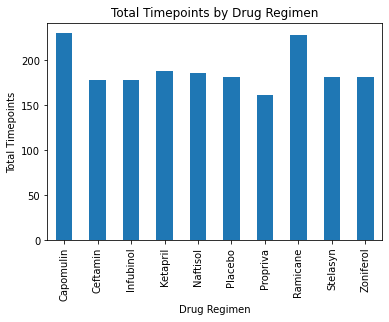

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Regimen_timepoint = Timepoint.plot(kind="bar", title="Total Timepoints by Drug Regimen")
Regimen_timepoint.set_xlabel("Drug Regimen")
Regimen_timepoint.set_ylabel("Total Timepoints")

Text(0.5, 1.0, 'Mouse Distribution by Gender')

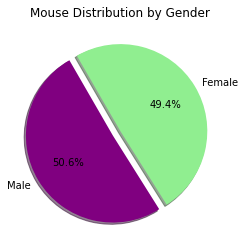

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = combined_mouse_results.loc[:, ["Sex"]]

labels = ["Male", "Female"]
gender = mouse_gender["Sex"].value_counts()
colors= ['purple', 'lightgreen']
explode = [0.1,0]

gender_count = plt.pie(gender, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Mouse Distribution by Gender")


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_by_mouse_ID = combined_mouse_results.groupby("Mouse ID")
max_timepoint = group_by_mouse_ID['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_volume = max_timepoint.merge(combined_mouse_results, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

     quartiles = max_timepoint_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    drug in drug_regimens:
    tumor_by_drug = max_timepoint_volume.loc[max_timepoint_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor_by_drug)
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

NameError: name 'tumor_volume' is not defined

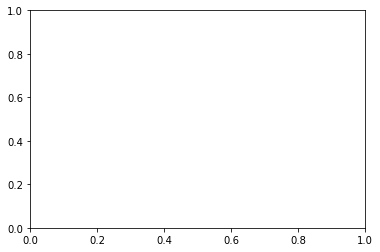

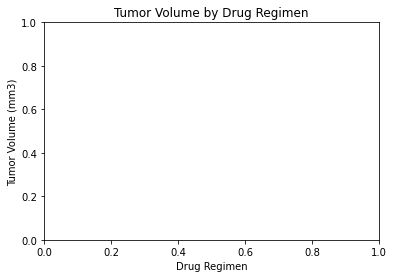

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig1, ax1 = plt.subplots()
x = [1,2,3,4]
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume)
plt.xticks(x, drug_regimens)
plt.show()

## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = combined_mouse_results.loc[combined_mouse_results["Mouse ID"] == "a275"]
Capomulin_time = Capomulin_mouse["Timepoint"]
Capomulin_volume = Capomulin_mouse["Tumor Volume (mm3)"]

x_axis = np.arange(0,45,0.5)

plt.plot(Capomulin_time, Capomulin_volume)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Timepoint for Capomulin Mouse a275")

plt.show()


NameError: name 'np' is not defined

Text(0.5, 1.0, 'Capomulin Average Tumor Volume v Mouse Weight')

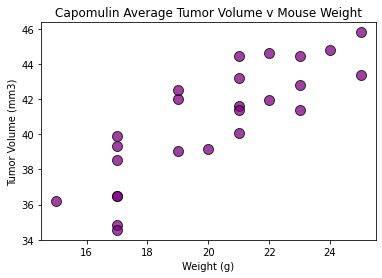

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_drug = combined_mouse_results.loc[combined_mouse_results["Drug Regimen"] == "Capomulin"]
Average_volume = Capomulin_drug.groupby(['Mouse ID']).mean()

Avg_tumor_vol = Average_volume['Tumor Volume (mm3)']
Avg_weight = Average_volume['Weight (g)']

plt.scatter(Avg_weight, Avg_tumor_vol, marker="o", facecolors="purple", edgecolors="black",
            s=100, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume v Mouse Weight")

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Avg_weight,Avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Avg_weight, Avg_tumor_vol)
#y = mx + b
regress_values = slope * Avg_weight  + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Avg_weight,Avg_tumor_vol)
plt.plot(Avg_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Regression by Average Mouse Weight v Average Tumor Volume")
 

The correlation between both factors is 0.84


NameError: name 'linregress' is not defined